In [179]:
from pydataset import data
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [180]:
%matplotlib inline
#RM - average number of rooms per dwelling
#LSTAT - % lower status of the population
#PTRATIO - pupil-teacher ratio by town
#MEDV - Median value of owner-occupied homes in $1000’s


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB
None


array([[<AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'LSTAT'}>],
       [<AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'MEDV'}>]], dtype=object)

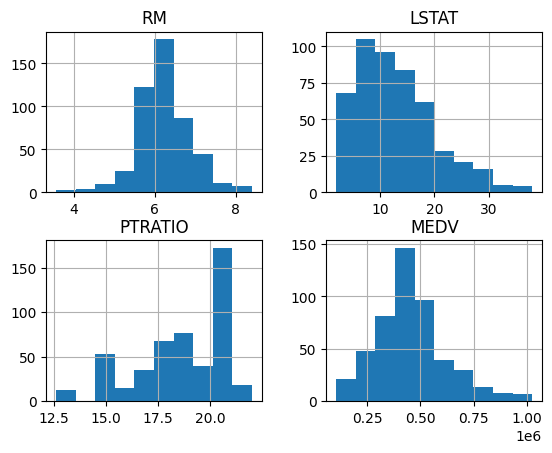

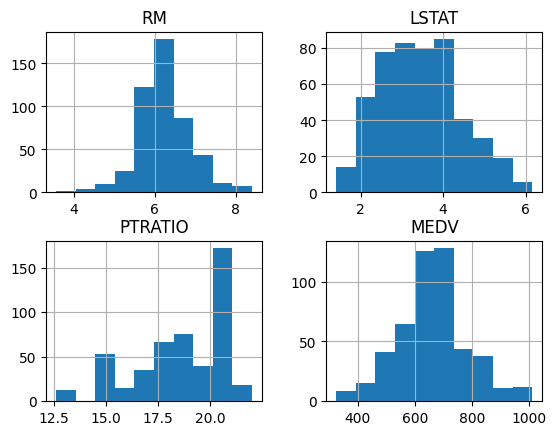

In [181]:
#housingData = data('BostonHouses')
housingData = pd.read_csv('BostonHouses.csv')
#print(housingData)

housingData.hist()
print(housingData.info())
# housingData['LSTAT'] = np.log(housingData['LSTAT']+1)
from scipy.stats import yeojohnson

#housingData['PTRATIO'], lambda_value = boxcox(housingData['PTRATIO'])
housingData['MEDV'] = np.sqrt(housingData['MEDV'])
housingData['LSTAT'] = np.sqrt(housingData['LSTAT'])
#housingData['RM'] = np.sqrt(housingData['RM'])

# housingData['PTRATIO'], lambda_value = yeojohnson(housingData['PTRATIO'])

# housingData['PTRATIO'] = 1 / (housingData['PTRATIO'] ** 2)
# housingData['RM'] = (housingData['RM'] ** 3)
# housingData['PTRATIO'] = 1 / housingData['PTRATIO']


housingData.hist()

<AxesSubplot:>

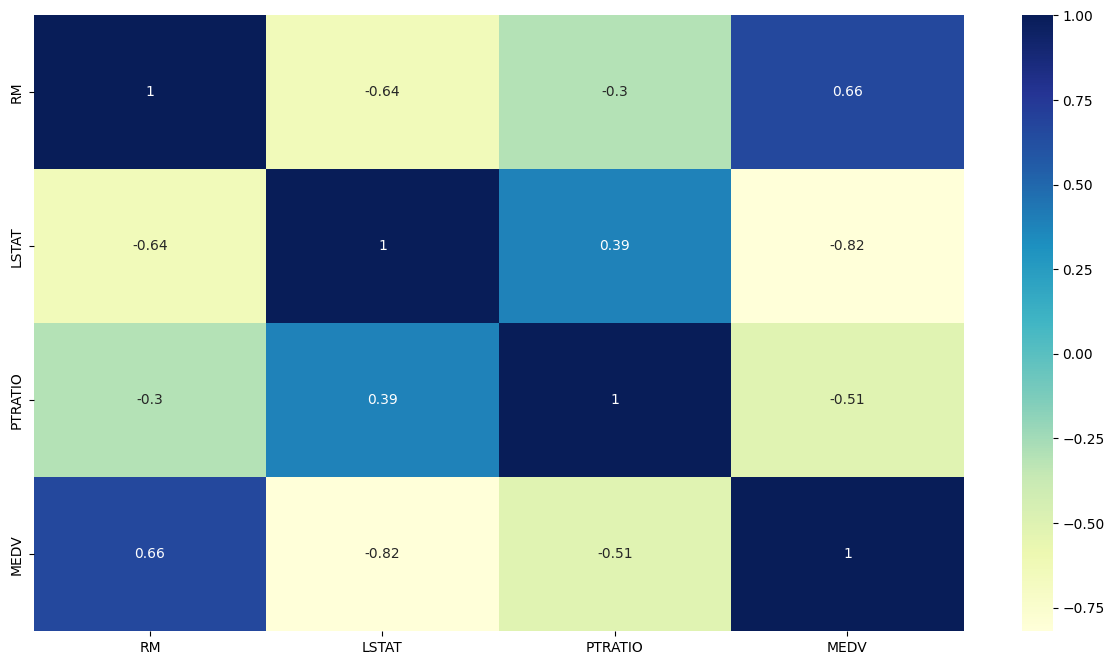

In [182]:
plt.figure(figsize=(15,8))
sns.heatmap(housingData.corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='LSTAT', ylabel='RM'>

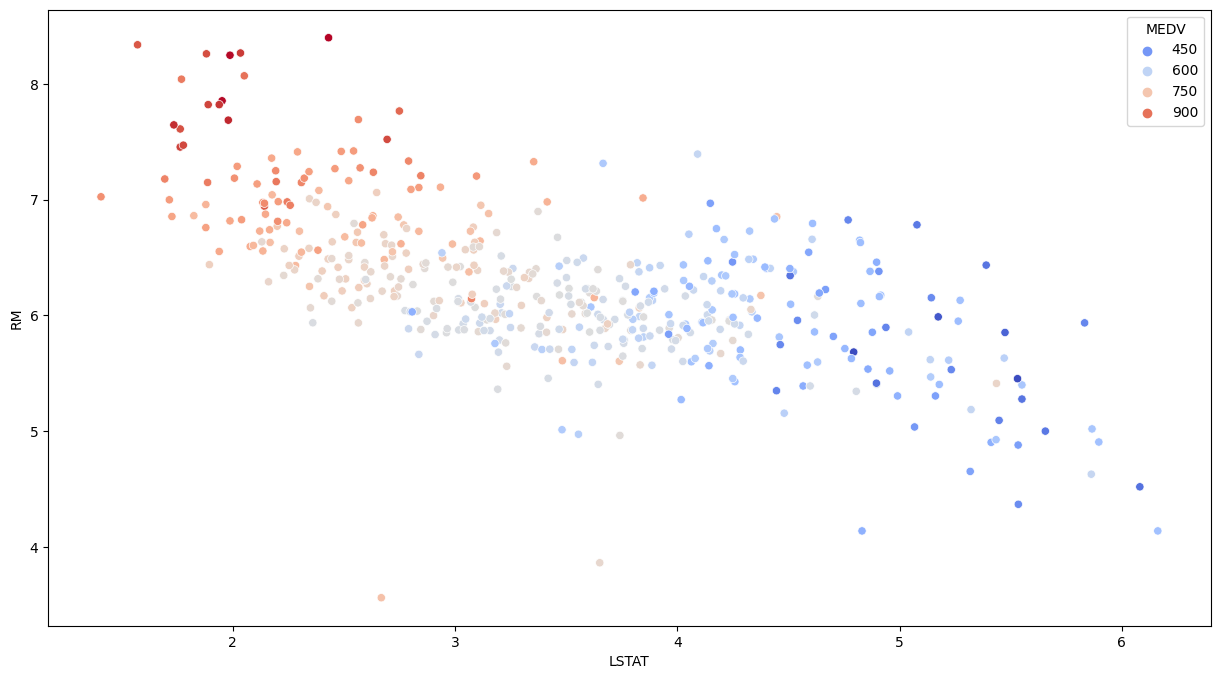

In [183]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='LSTAT', y='RM', data=housingData,hue='MEDV', palette="coolwarm" )

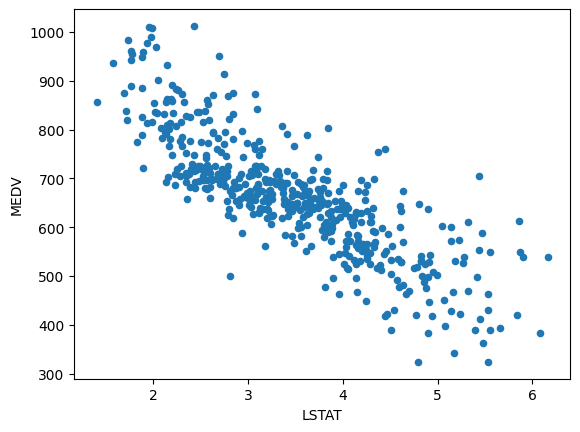

In [184]:
housingData.plot(kind='scatter', x='LSTAT', y='MEDV')
plt.show()

In [185]:
#Test train split
features = pd.DataFrame({"LSTAT": housingData.LSTAT, "RM": housingData.RM, "PTRATIO": housingData.PTRATIO})
x_train, x_test, y_train, y_test = train_test_split(features, housingData.MEDV)
#x_train, x_test, y_train, y_test = train_test_split([housingData.LSTAT, housingData.RM], housingData.MEDV)

In [186]:
# plt.scatter(x_train, y_train, label= "Training Data", color="r", alpha=0.7 )
# plt.scatter(x_test, y_test, label= "Training Data", color="g", alpha=0.7 )
# plt.legend()
# plt.title("Test Train Split")
# plt.show()

In [187]:
#Creating linear model and training
LR = LinearRegression()
LR.fit(x_train.values, y_train.values)

LinearRegression()

In [188]:
LR.score(x_test.values, y_test.values)

0.7831763262565246

In [189]:
#Use model
prediction =  LR.predict(np.array([[3.5]]))

#plot prediction line across actual test
plt.plot(x_test, prediction, label="Linear Regression", color="b")
plt.scatter(x_test, y_test, label='Actual Test Data', color='g', alpha=0.7)
plt.legend()
plt.show()

ValueError: X has 1 features, but LinearRegression is expecting 3 features as input.

In [ ]:
#predict
LR.predict(np.array([[3.5]]))
LR.score(x_test.values.reshape(-1,1), y_test.values)

0.6386247310925275